# Visualizing Earnings based on College Majors

In this project, we will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

By using data visualization techniques, we can start to explore questions from the dataset like:
- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?
- and many more...

---
Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

Read the dataset into a DataFrame and start exploring the data:

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0], end='\n\n')
print(recent_grads.head(), end='\n\n')
print(recent_grads.tail(), end='\n\n')
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

   Rank  M

We need to drop rows with missing values. Because matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [4]:
raw_data_count = len(recent_grads.index)
print("raw_data_count = " + str(raw_data_count))
recent_grads = recent_grads.dropna(axis=0)
cleaned_data_count = len(recent_grads.index)
print("cleaned_data_count = " + str(cleaned_data_count))


raw_data_count = 173
cleaned_data_count = 172


Thus, we can notice that only one row contained missing values and was dropped.

# Scatter Plots

Here, we will be generating scatter plots in separate jupyter notebook cells to explore the following relations:
1. Sample_size vs Median:

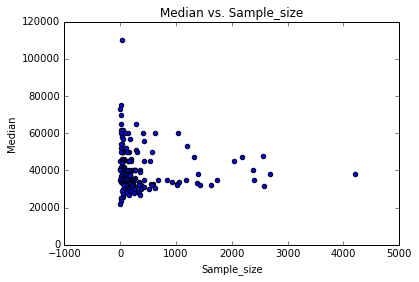

In [5]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')

---
- Sample_size and Unemployment_rate:

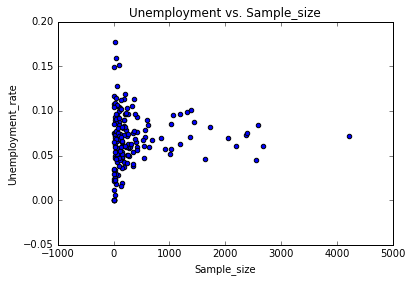

In [6]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment vs. Sample_size')

---
- Full_time and Median:

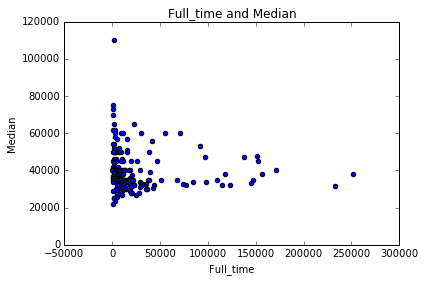

In [7]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time and Median')

---
- ShareWomen and Unemployment_rate:

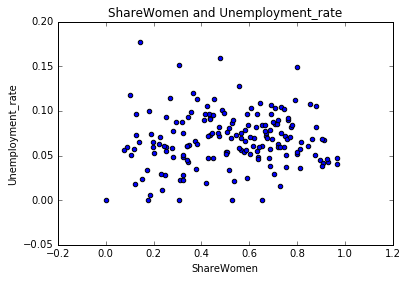

In [8]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen and Unemployment_rate')

---
- Men and Median:

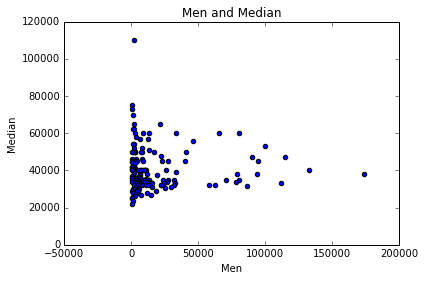

In [9]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men and Median')

---
- Women and Median:

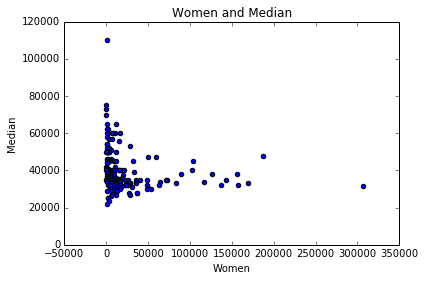

In [10]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women and Median')

### Insights: 

From the scattered plot above, it can be observed that students in more popular majors earn wages between 30k to 40k. Again, subjects with female majority make less money than others. With the increase of number of full time employees, median salary averaged between 30k to 40k. But it can be predicted that companies with small number of full time emplyees tend to pay higher median salary.

# Histograms:

Here, we will be using the histograms to explore the following questions:

- What percent of majors are predominantly male? Predominantly female?

- What's the most common median salary range?

--- 
- Sample size:

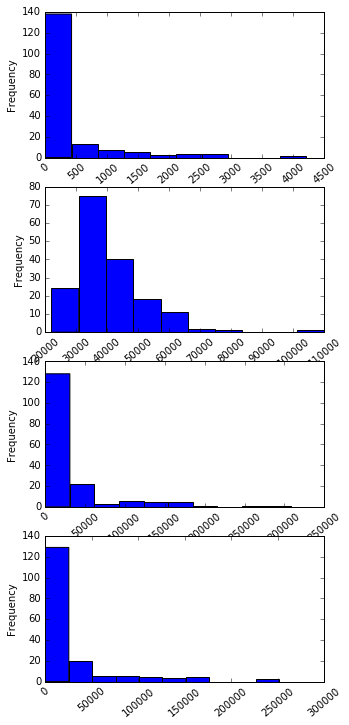

In [11]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4):
    ax = fig.add_subplot(4,1,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

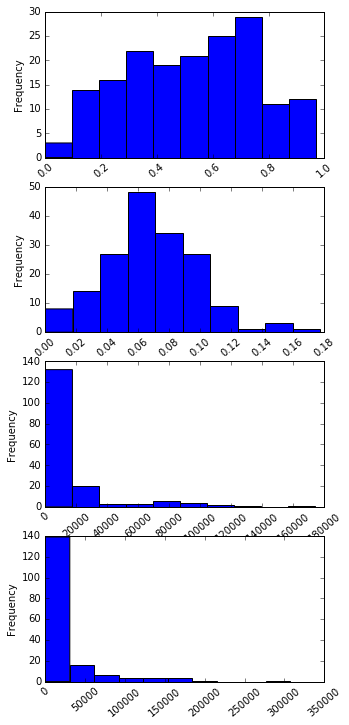

In [12]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4, 8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

### Insights:

The most common median salary range is between 22000 to 45000. Almost 40% of majors are predminant by Women (60% share women rate). Again, around 30% of majors are male predominant (with share women rate of 40%).

# Scatter matrix Plot:

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and will allow us to explore potential relationships and distributions simultaneously.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ceb2bd240>,
      dtype=object)

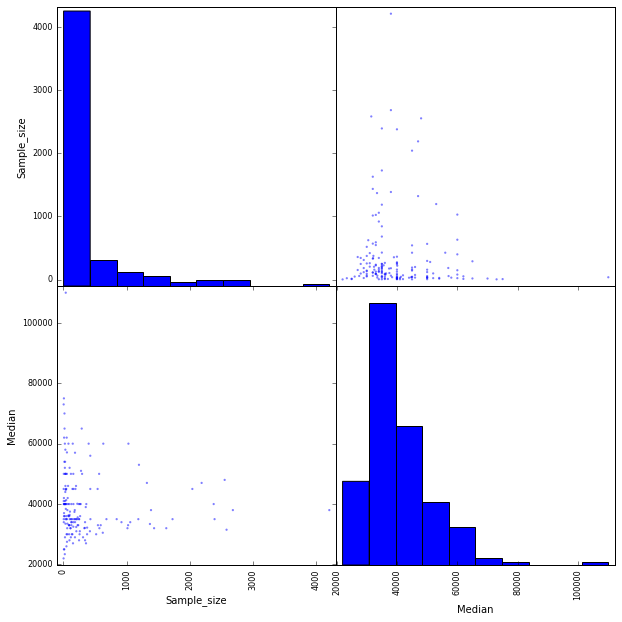

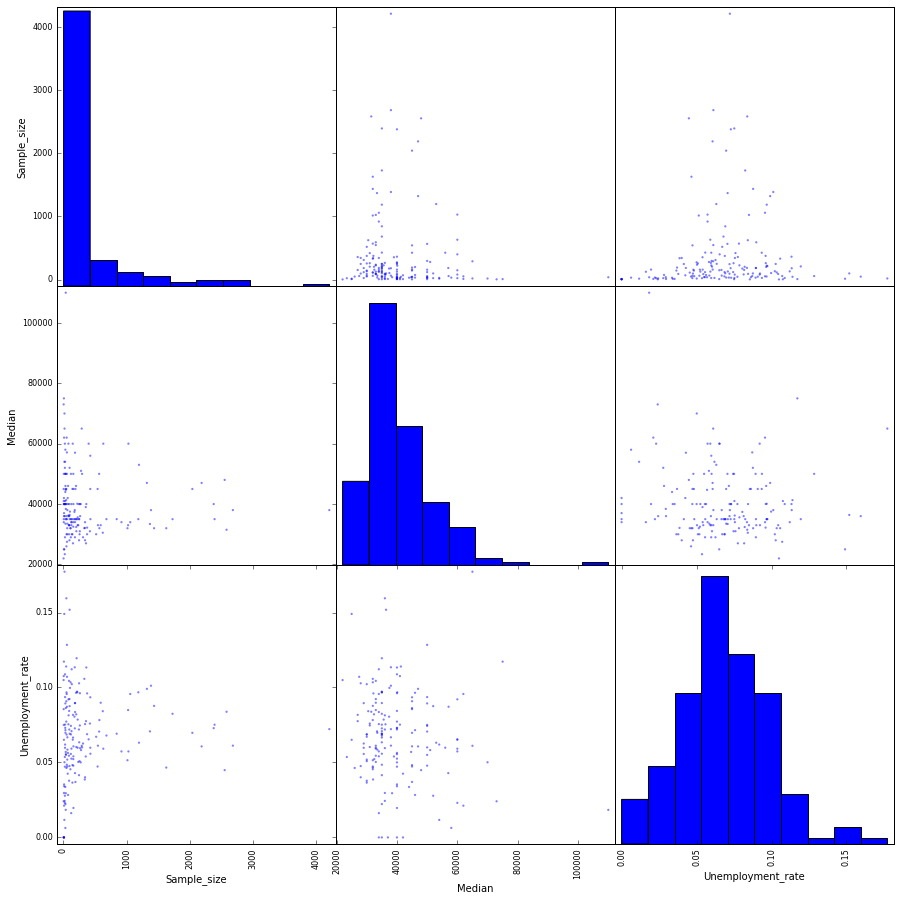

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15))

# Visualizing with pandas and Bar Plots:

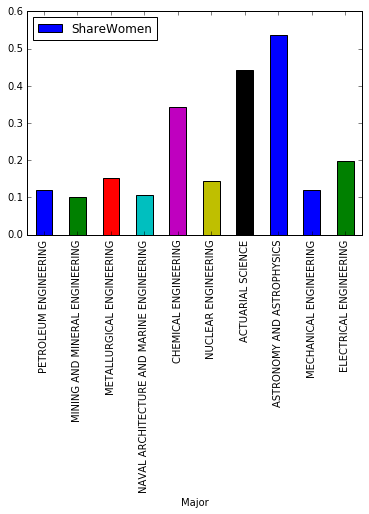

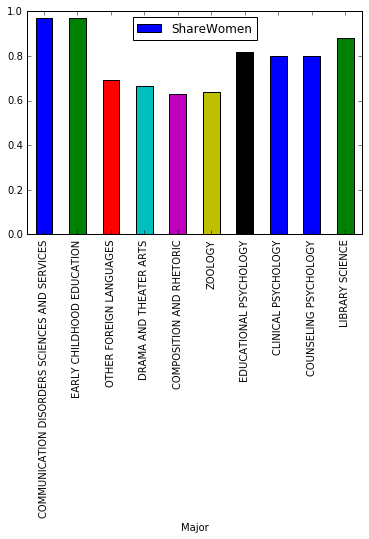

In [18]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

Women are tend to prefer majors from Psychology and Social Work departments. The median salary range of these subjects are categorized as low wages.